<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/Dive_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **动手深度学习**

##  3.6 SoftMax_regression

In [1]:
!pip install d2l

     |████████████████████████████████| 82 kB 328 kB/s 
     |████████████████████████████████| 61 kB 6.9 MB/s 
     |████████████████████████████████| 9.9 MB 29.0 MB/s 
     |████████████████████████████████| 11.2 MB 30.6 MB/s 
     |████████████████████████████████| 899 kB 45.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you h

In [2]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 12.8 MB 4.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms


def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
# mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,download=True)
# len(mnist_train)
# mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,download=True)
# print(len(mnist_test))

# mnist_train中包含60000个数据，第一个0表示其中的第一个数据。每个数据由一张图像和一个label构成。
# 所以第二个0表示其中的图像部分。你可以尝试输出mnist_train[0][1]，你将会得到一个int，表示该图像对应的label。
# print(mnist_train[0][0])


batch_size=256

# mnist_train[index] 是一个 turple。 
# turple 包含图像数据及其标签。因此您需要在第二个方括号中设置 0 或 1 以获取图像数据或其标签
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)


count=0
# 遍历train_iter一下其实就是输出一个batch内的图像和对应的label
for batch_img,label in train_iter:
    print(batch_img.shape,len(label))
    break


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28]) 256


KeyboardInterrupt: ignored

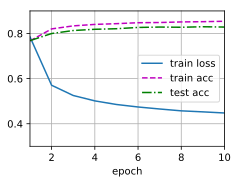

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms
import torch
from IPython import display
from d2l import torch as d2l
# 加载数据
batch_size = 256
def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
train_iter, test_iter =load_data_fashion_mnist(batch_size,28)
# 遍历train_iter一下其实就是输出一个batch内的图像和对应的label
# for batch_img,label in test_iter:
#     print(batch_img.shape,len(label))
#     break


# 初始化模型参数
num_input=784
num_output=10
w=torch.normal(0,0.01,size=(num_input,num_output),requires_grad=True)
b=torch.zeros(num_output,requires_grad=True)


#定义softmax
x=torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(x.sum(0,keepdim=True),x.sum(1,keepdim=True)) 

def softmax(x):
  x_exp=torch.exp(x)
  x_exp_sum=x_exp.sum(1,keepdim=True)
  return x_exp / x_exp_sum
x=torch.normal(0,0.01,(3,6))
x_prob=softmax(x)
print(x_prob,"\n",x_prob.sum(1))


# define model
# -1是用来1填充batch_size,reshape函数将每张原始图像展平为向量
def net(x):
  return softmax(torch.matmul(x.reshape(-1,w.shape[0]),w)+b)



# loss_fn
# y中第一个样本中，第一类是正确的预测,第二个样本第三类是正确的
y=torch.tensor([0,2])
# y_hat，其中包含2个样本在3个类别的预测概率，
y_hat=torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# 然后使用y作为y_hat中概率的索引,左边的[0,1],表示第0和第1个样本
# y_hat[[0,1],y]
def cross_entropy(y_hat,y):
  return -torch.log(y_hat[range(len(y_hat)),y])
print("cross_entroy:",cross_entropy(y_hat,y))


# 精度
def accuracy(y_hat,y):
  if y_hat.shape[0]>1 and y_hat.shape[1]>1:
    # y_hat=torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
    # y_hat = y_hat.argmax(axis=1)
    # print("y_hat.argmax(axis=1)",y_hat)
    y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())
print("精度:",accuracy(y_hat, y) / len(y))


# 评估net的精度
class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
# In [26]: metric = Accumulator(2) 
# In [27]: metric
# Out[27]: <__main__.Accumulator at 0x7f2e4827f820>
# In [28]: metric.data
# Out[28]: [0.0, 0.0]
# In [29]: metric.add(1, 2)
# In [30]: metric.data
# Out[30]: [1.0, 2.0]
def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
print("evaluate_accuracy",evaluate_accuracy(net, test_iter))





# train一次
# input:net, train_iter, loss, updater,    ..注意它传入net,train_iter,loss结构,和优化器
# output:训练损失和训练精度
def train_epoch(net,trian_iter,loss,updater):
  if isinstance(net,torch.nn.Module):
    net.train()
  metrix=Accumulator(3)
  for x,y in train_iter:
    y_hat=net(x)
    l=loss(y_hat,y)
    if isinstance(updater,torch.optim.Optimizer):
      # 使用PyTorch内置的优化器和损失函数
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
       # 使用定制的优化器和损失函数
       l.sum().backward()
       updater(x.shape[0])
    metrix.add(float(l.sum()),accuracy(net(x),y),y.numel())# accuracy是正确预测数
  # output:训练损失和训练精度
  return metrix[0]/metrix[2],metrix[1]/metrix[2]



# 动画中绘制数据的实用程序类Animator
class Animator:  
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


# 实现完整的训练函数
# input:net, train_iter, test_iter, loss, num_epochs, updater
# output:图上
def train(net, train_iter, test_iter, loss, num_epochs, updater):
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_input):
    train_metrix=train_epoch(net,train_iter,loss,updater)
    test_acc=evaluate_accuracy(net,test_iter)
    animator.add(epoch+1,train_metrix+(test_acc,))
  train_loss, train_acc = train_metrix
  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc


# updater
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent.`"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
lr=0.1
def updater(batch_size):
  return d2l.sgd([w,b],lr,batch_size)

# 训练过程显示
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)


##  3.7  Soft_MAX简洁实现


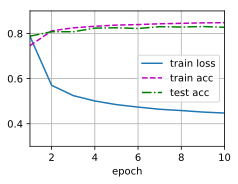

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# apply 函数将递归搜索网络中的所有模块，并在每个模块上调用该函数。 因此，您在模型中拥有的所有线性层都将使用这一调用进行初始化
net.apply(init_weights);


# 损失函数
# Softmax的实现
# CrossEntropyLoss这个函数里面包含了SoftMax思想,
loss = nn.CrossEntropyLoss(reduction='none')

# 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

# 训练
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 测试多少batch是比较合适的，画出图像

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


123.85
63.96
41.83
32.24
26.91
23.53
20.76
18.79
17.51
16.09
14.97
14.15
13.31
12.94
12.77
11.77
11.48
11.12
10.74
10.45
10.47
9.91
9.57
9.55
9.27
9.02
8.77
8.57
8.51
8.37
8.30
8.21
8.22
7.98
7.76
7.79
7.74
7.60
7.53
7.56
7.50
7.38
7.24
7.16
7.17
7.11
7.10
7.04
7.02
6.93
6.91
6.86
6.82
6.84
7.02
6.77
6.73
6.63
6.61
6.59
6.57
6.53
6.47
6.56
6.50
6.46
6.53
6.39
6.44
6.45
6.40
6.40
6.35
6.30


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

6.78


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.12


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.13


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.16


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    self._shutdown_workers()
    if w

6.97


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
    

7.14
6.28
6.17
6.19
6.22
6.18
6.16
6.12
6.15
6.15
6.17
6.03
6.05
6.07
6.02
6.02
6.03
6.00
6.02
5.96
5.94
5.90
6.01
5.97
5.97
5.95
5.89
5.91
5.89
5.87
5.87
5.82
5.87
5.80
5.81
5.80
5.81
5.78
5.78
5.81
5.75
5.79
5.74
5.74
5.71
5.76
5.71
5.69
5.74
5.75
5.67
5.68
6.09
5.60
5.66
5.64
5.71
5.61
5.63
5.63
5.63
5.60
5.64
5.65
5.66
5.60
5.66
5.66
5.59
5.61
5.57
5.58
5.55
5.52
5.65
5.64
5.60
5.58
5.58
5.53
5.55
5.52
5.54
5.52
5.51
5.50
5.51
5.46
5.57
5.48
5.46
5.44
5.49
5.46
5.47
5.40
5.52
5.46
5.47
5.48
5.41
5.42
5.43
5.41
5.37
5.42
5.41
5.46
5.41
5.45
5.37
5.42
5.39
5.41
5.38
5.41
5.35
5.43
5.40
5.37
5.35
5.39
5.42
5.39
5.39
5.39
5.34
5.40
5.34
5.42
5.37
5.35
5.35
5.43
5.43
5.37
5.39
5.38
5.34
5.43
5.37
5.27
5.35
5.26
5.33
5.34
5.31
5.27
5.34
5.27
5.30
5.35
5.34
5.28
5.32
5.31
5.31
5.30
5.33
5.35
5.37
5.26
5.27
5.27
5.25
5.25
5.30
5.28
5.28
5.29
5.31
5.24
5.31
5.26
5.24
5.26


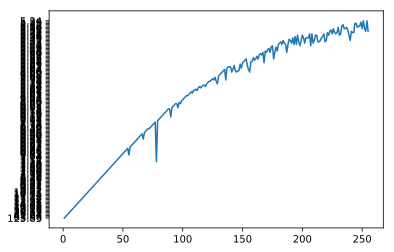

In [ ]:
import matplotlib.pyplot as plt
a = range(1,256)
c=[]
for i in a:
  train_iter,test_iter=d2l.load_data_fashion_mnist(i)
  timer=d2l.Timer()
  for X,y in train_iter:
    continue
  b='%.2f' % timer.stop()    
  print (b)
  c.append(b)
plt.plot(a,c)

###  测试多少num_worker是比较合适的，画出图像??why

1.02
0.93


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.97


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.03


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.08


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.10


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.14


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.18


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 9 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.22


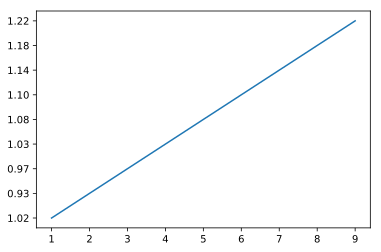

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms
import torch
from IPython import display
from d2l import torch as d2l
# 加载数据
batch_size = 256
def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
train_iter, test_iter =load_data_fashion_mnist(batch_size,28)
n = range(1,10)
c=[]
batch_size = 256
mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
for i in n:
  train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=i)
  timer=d2l.Timer()
  for img,label in train_iter:
    continue
  b='%.2f' % timer.stop()    
  print (b)
  c.append(b)
plt.plot(n,c)

## 4.1多层感知机


1.  感知机是一个二分类问题,无法解决XOR,很多层感知机也是一个线性y=AW+b,激活函数可以引入了非线性,RuLu最棒的激活函数,singmoid,tanh里面有指数运算,再计算式很慢
2.  超参数:隐藏层数和隐藏层大小,lr,num_epoch---如何找到最优解-有点像老中医,很难找到
1.如果实验深度和宽度找最优解.比如input:128->output:2  
first:不考虑hidden layer,128->2
second:只考虑一层hidden layer:128->8/16/32/64->2
third:再第二考虑好的情况下(选16,32),多来一层,128->16/32->16/32->2
.....
2. 解决超参数-网格搜索可能是一个很好的方法。 以指数方式增加值。 也许尝试二进制搜索。 这个想法不是线性的，而是按对数的顺序。  





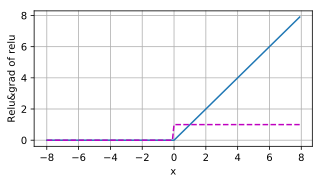

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

x=torch.arange(-8,8,0.1,requires_grad=True)
y=torch.relu(x)
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","Relu&grad of relu",figsize=(5,2.5))

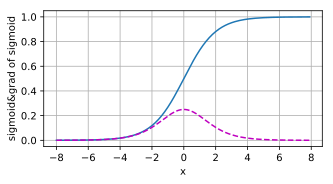

In [ ]:
x.grad.data.zero_()
y=torch.sigmoid(x)
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","sigmoid&grad of sigmoid",figsize=(5,2.5))

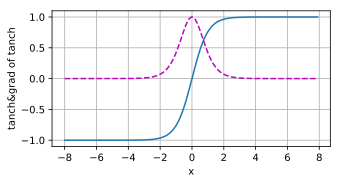

In [ ]:
y=torch.tanh(x)
x.grad.data.zero_()
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","tanch&grad of tanch",figsize=(5,2.5))

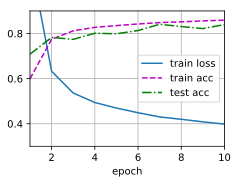

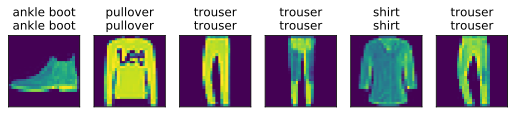

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


# 加载数据
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers=2
test_iter.num_workers=2

# 初始化模型参数
num_inputs,num_outputs,num_hiddens=784,10,64
w1=nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
w2=nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs))
params=[w1,b1,w2,b2]


# 激活函数
def relu(x):
  a=torch.zeros_like(x)
  return torch.max(a,x)


#定义模型
def net(x):
  x=x.reshape(-1,num_inputs)
  H1=relu((x@w1)+b1)  # 这里“@”代表矩阵乘法
  return ((H1@w2)+b2)


# loss
loss=nn.CrossEntropyLoss(reduction='none')


# 定义优化器
lr=0.1
updater=torch.optim.SGD(params,lr=lr)

# train  --为啥没loss
num_epochs=10
# 你debug进代码查看loss值，会发现loss的值很小，大概小数点后三(0.001),所以在图形上无法辨认
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

d2l.predict_ch3(net, test_iter)

##  4.2 多层感知机简洁实现

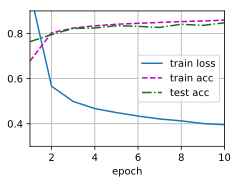

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

# 定义模型
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.Tanh(),nn.Linear(256,10))
def init_weights(m):
  if type(m)==nn.Linear:
    nn.init.normal(m.weight,std=0.01)
    #m.weight在与x做torch.mtamul,可能X*W.T具体看源码
    print(m.weight.shape)
# nn.Linear的weight和bias会自动初始化，这里使用init_weight只是不希望采用对weight的默认初始化，对bias采用默认初始化就可以
net.apply(init_weights) 

# loss 和optimiser
lr=0.1
# reduction ( string , optional ) – 指定要应用于输出的缩减： 'none'| 'mean'| 'sum'. 'none'：不应用减少，'mean'：取输出的加权平均值， 'sum'：输出将被求和。
loss=nn.CrossEntropyLoss(reduction='none')
optimizer=torch.optim.SGD(net.parameters(),lr=lr)


# train
num_epochs=10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,optimizer)

### with practice
1. 计算pReLU激活函数的导数。
1. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
1. 证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。
1. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。你认为这会导致什么样的问题？


1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
1. 尝试添加更多的隐藏层，并查看它对结果有何影响。
1. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
1. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？
  我们如何定义最佳结果？ 是测试数据集上的最小测试损失还是最大准确度？ 我们是否保持时代不变？
1. 描述为什么涉及多个超参数更具挑战性。
  ans:**优化多个超参数很困难，因为优化函数不一定是凸的，并且敏感性研究需要大量计算时间来运行多个训练,如果我们有多个超参数，那么所有参数的混合搭配将创建指数数量的参数来优化**。
1. 如果要构建多个超参数的搜索方法，你能想到的最聪明的策略是什么？
ans**:网格搜索可能是一个很好的方法。 以指数方式增加值。 也许尝试二进制搜索。 这个想法不是线性的，而是按对数的顺序。**

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

In [ ]:
# Q1 EASY
# Q2 绘制出RELU(x)的图像后，我们可以发现，如果输出值经过下一层隐藏层的计算，如果＜0则这个数据被舍弃。相当于一个状态在某一层中会被筛选，而被筛选的条件由下一层隐藏层决定，然而这个状态是连续的，因此就会产生类似于分段的效果。
# Q3 
z = torch.tensor([1.0,1.5,2.], dtype=float)
b = torch.tanh(z)+1.0
c = 2.0*torch.sigmoid(2.0*z)
print(b.data,c.data)

tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64) tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64)


## 4.4模型选择欠拟合和过拟合


(200, 20)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


29.34464612007141 19.820705127716064
weight: [[3.2776294]]
9.692418313026428 5.871062827110291
weight: [[2.6787126 4.068766 ]]
4.382171165943146 4.4775847554206845
weight: [[ 4.5545435  4.0954185 -3.1014042]]
0.00013454468353302218 9.164011426037178e-05
weight: [[ 4.9998703  1.1991742 -3.4005308  5.5995154]]
0.0030445072799921034 0.00441016562981531
weight: [[ 4.9480586  1.190175  -3.2090547  5.618393  -0.4169733]]
0.008279014192521573 0.00737418862991035
weight: [[ 4.916617   1.3087329 -3.1194239  5.014804  -0.6214391  1.6778023]]
0.007722965232096613 0.00704989223740995
weight: [[ 4.919599    1.307885   -3.1272008   5.0214257  -0.61998874  1.6569287
   0.08926564]]
0.007512507773935795 0.006727396231144667
weight: [[ 4.9247513   1.3102561  -3.1550086   5.0078273  -0.47597635  1.6823118
  -0.33946356  0.05716798]]
0.006404024339281023 0.00618357197381556
weight: [[ 4.92667     1.2994308  -3.1481318   5.074593   -0.6030872   1.4292266
   0.21852824  0.4766591   0.17529629]]
0.007020895

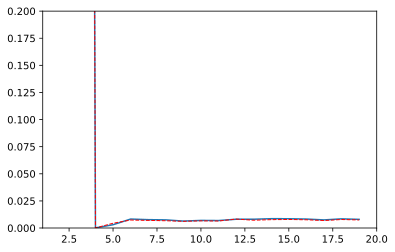

In [ ]:
from numpy.core.fromnumeric import size
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt


max_degree=20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5, 1.2, -3.4, 5.6])
features=np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
# print(features.shape)
# np.arange(max_degree).reshape(1, -1).shape
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))
print(poly_features.shape)
for i in range(max_degree):
  poly_features[:,i]/=math.gamma(i+1)# gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels=np.dot(poly_features,true_w)
labels+=np.random.normal(scale=0.01,size=labels.shape)

# numpy 转换为tensor
true_w,features,poly_features,labels=[torch.tensor(x,dtype=torch.float32) for x in [true_w,features,poly_features,labels]]
features[:2],poly_features[:2,:],labels[:2]

def evaluate_loss(net,data_iter,loss):
  metric=d2l.Accumulator(2)
  for x,y in data_iter:
    out=net(x)
    y=y.reshape(out.shape)
    l=loss(out,y)
    metric.add(l.sum(),l.numel())
  return metric[0]/metric[1]

c=[]
d=[]
def train(train_features,test_features,train_labels,test_lables,num_epochs=400):
  loss=nn.MSELoss(reduce="none")
  input_shape=train_features.shape[-1]
  #不需要偏置在开始已经弄了
  net=nn.Sequential(nn.Linear(input_shape,1,bias=False))
  batch_size=min(10,train_labels.shape[0])
  train_iter=d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size)
  test_iter=d2l.load_array((test_features,test_lables.reshape(-1,1)),batch_size,is_train=False)
  trainer=torch.optim.SGD(net.parameters(),lr=0.01)
  # animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
  #                           xlim=[1, num_epochs], ylim=[1e-3, 1e2],
  #                           legend=['train', 'test'])                          
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net,train_iter,loss,trainer)
    # if epoch==0 or (epoch+1)%20==0:
    #   animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
    #                 evaluate_loss(net, test_iter, loss)))
    if epoch==399:
        print(evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss))
        c.append(evaluate_loss(net, train_iter, loss))
        d.append(evaluate_loss(net, test_iter, loss))
  # return  evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)
  print('weight:', net[0].weight.data.numpy())


# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
# 选择最佳维度
a = range(1,20)
for i in a:
  train(poly_features[:n_train, :i], poly_features[n_train:, :i],
      labels[:n_train], labels[n_train:])
plt.xlim((1, 20))
plt.ylim((0, 0.2))
plt.plot(a,c,label='train')
plt.plot(a,d, color='red', linewidth=1.0, linestyle='--',label='test')
plt.show()
  # animator = d2l.Animator(xlabel='num_featurenum_feature', ylabel='loss', yscale='log',
  #                           xlim=[2, 20], ylim=[1e-3, 1e2],
  #                           legend=['train', 'test'])
  # animator.add(i + 1, (train,test))
  
# train(poly_features[:n_train, :8], poly_features[n_train:, :8],
#       labels[:n_train], labels[n_train:])
# train(poly_features[:n_train, :16], poly_features[n_train:, :16],
#       labels[:n_train], labels[n_train:])
# # 从多项式特征中选择前2个维度，即1和x
# train(poly_features[:n_train, :2], poly_features[n_train:, :2],
#       labels[:n_train], labels[n_train:])
# # 从多项式特征中选取所有维度
# train(poly_features[:n_train, :], poly_features[n_train:, :],
#       labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.5权重衰减

w的L2范数： 0.9784116744995117


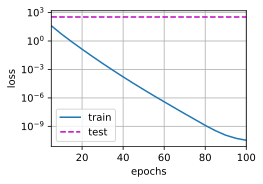

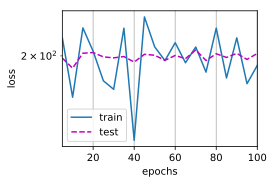

In [47]:
import torch
from torch import nn
from d2l import torch as d2l
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones((num_inputs,1)),0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)#这个函数返回两个值,X,Y
print(train_data[0].shape,train_data[1].shape)
train_iter=d2l.load_array(train_data,batch_size,is_train=True)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size,is_train=False)

# init_params [w,b] ???啥意思
def init_params():
  w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
  b=torch.zeros(1,requires_grad=True)
  return [w,b]
# w,b=init_params()
# print(w.shape,b.shape)



# 定义L2的范数惩罚
def l2_penalty(w):
  return torch.sum(w.pow(2))/2 #w.pow(2)==w**2


# 训练代码
def train(lambd):
  w,b=init_params()
  net,loss=lambda x: d2l.linreg(x,w,b),d2l.squared_loss
  num_epochs,lr=100,0.003
  animater=d2l.Animator(xlabel="epochs",ylabel="loss",yscale="log",xlim=[55,num_epochs],legend=["train","test"])
  for epoch in range(num_epochs):
    for x,y in train_iter:
      l=loss(net(x),y)+lambd*l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w,b],lr,batch_size)
    if(epoch+1)%5==0:
      animater.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),
                            d2l.evaluate_loss(net,test_iter,loss)))
  print("w的L2范数:",torch.norm(w).item())
# train(lambd=0)
# train(lambd=3)
# train(lambd=8)






# 简单实现
def train_concise(wd):
  net=nn.Sequential(nn.Linear(num_inputs,1))
  for param in net.parameters():
    param.data.normal_()
  loss=nn.MSELoss(reduction="none")
  num_epochs,lr=100,0.003
  trainer=torch.optim.SGD([
          {"params":net[0].weight,"weight_decay":wd},
          {"params":net[0].bias}],lr=lr)
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for x,y in train_iter:
      trainer.zero_grad()
      l=loss(net(x),y)
      l.mean().backward()
      trainer.step()
    if (epoch+1)%5==0:
      animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
  print('w的L2范数：', net[0].weight.norm().item())
train_concise(0)
train_concise(100)